# ONE:
 - perform sentiment analysis on Elon Musk tweets
- to perform sentiment analysis on elon musk tweets using positive ,negative and stop word

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
import matplotlib.pyplot as plt
import warnings
import re
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
%matplotlib inline


[nltk_data] Downloading package punkt to C:\Users\sanjana
[nltk_data]     pal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# importing and reading the data
df = pd.read_csv('Elon_musk.csv',encoding='Latin 1')

In [3]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
# drop duplicate values from data
df.drop_duplicates(inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
# drop unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
#df['Length'] = df['Text'].apply(len)
#df

In [9]:
# to display full dataset we are using set_option.
pd.set_option('display.max_colwidth',None)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [10]:
# Load positive, Negative and Stop Words

In [11]:
# loading positive words
with open('positive-words.txt', 'r') as f:
    positive_words = f.read().splitlines()
    print(positive_words)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Positive', ';', '; This file contains a list of POSITIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a senten

In [12]:
# loading negative words
with open('negative-words.txt','r') as f:
    negative_words = f.read().splitlines()
    print(negative_words)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Negative', ';', '; This file contains a list of NEGATIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a sent

In [13]:
stop_word = 'stop.txt'

In [14]:
with open(stop_word,'r') as f:
    stopwords = set(f.read().splitlines())
    print(stopwords)

{'contain', 'another', 'tries', 'itself', 'thereafter', 'below', 'many', 'needs', 'regarding', 'somebody', "what's", 'via', 'moreover', 'ourselves', 'please', 'hereby', 'whether', "it'll", 'thoroughly', 'exactly', 'my', 'lately', 'taken', "don't", 'forth', 'ones', 'seems', 'first', 'towards', 'sometime', 'everybody', 'apart', 'twice', 'yours', 'why', 'only', 'there', 'n', 't', 'wish', 'want', 'rather', 'them', 'instead', 'nearly', 'upon', 'much', "doesn't", 'both', 'b', 'six', 'thanx', 'downwards', 'howbeit', "shouldn't", 'obviously', 'between', 'saying', 'together', 'happens', 'nothing', 'they', 'something', 'after', 'far', 'who', 'few', 'well', 'different', 'novel', 'behind', "isn't", 'changes', 'whole', 'since', 'probably', 'right', 'am', 'gets', 'yet', 'says', 'appear', 'f', 'thats', 'more', 'how', 'in', 'according', 'take', 'keeps', 'best', 'hence', 'using', 'yourselves', 'afterwards', 'et', 'under', "haven't", 'formerly', 'secondly', "he's", 'me', 'known', 'containing', 'lest', '

In [18]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [25]:
# using sentimentIntensity anlayzer to analysed the sentiment
from nltk.sentiment import SentimentIntensityAnalyzer

In [26]:
# create new column to store differnt values
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Text'].apply(lambda x:sid.polarity_scores(x))
df['sentiment_score']

0                 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1                 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2          {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
3         {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.2732}
4          {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8513}
                                     ...                               
1994    {'neg': 0.234, 'neu': 0.588, 'pos': 0.178, 'compound': -0.4215}
1995        {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.636}
1996              {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1997      {'neg': 0.537, 'neu': 0.463, 'pos': 0.0, 'compound': -0.7003}
1998       {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
Name: sentiment_score, Length: 1999, dtype: object

In [27]:
#anothere column is created,and lambda is used to created a function.
df['com_score'] = df['sentiment_score'].apply(lambda x:x['compound'])
df['com_score']

0       0.0000
1       0.0000
2       0.6588
3      -0.2732
4       0.8513
         ...  
1994   -0.4215
1995    0.6360
1996    0.0000
1997   -0.7003
1998    0.4215
Name: com_score, Length: 1999, dtype: float64

In [28]:
# new columns sentiment_label store the value,if value is >=0 it is positive otherwise negative.
df['sentiment_label'] = df['com_score'].apply(lambda x:'positive'if  x>=0 else 'negative')
df['sentiment_label']

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
1994    negative
1995    positive
1996    positive
1997    negative
1998    positive
Name: sentiment_label, Length: 1999, dtype: object

In [29]:
# sentiment count store the positive and negative values.
print(" Sentiment count:",df['sentiment_label'].value_counts())

 Sentiment count: positive    1767
negative     232
Name: sentiment_label, dtype: int64


- As we saw that there are positive words are 1767 and negative are 232 out of total 1999

In [32]:
# join is used to remove space
txt= " ".join(df['Text'])

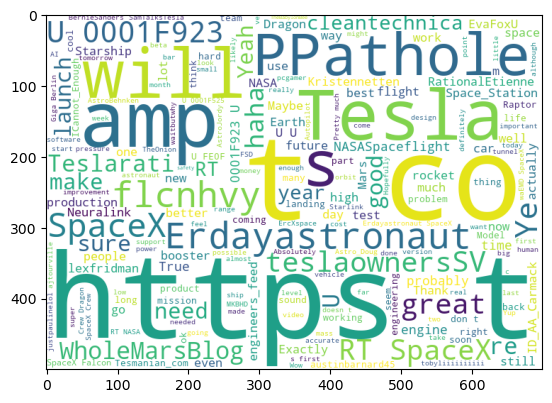

In [33]:
# Worldcloud is used to shows ,which words is used most of the time.
wc = WordCloud( background_color='White', width=700,height=500,colormap=None).generate(txt)
plt.imshow(wc)